## Q1. Use following sentences to find the tf*idf vectorized data.
1. The postman delivered the package to the wrong address.
2. I wrapped a beautiful present for my friend's birthday.
3. The delivery truck arrived late due to heavy traffic.
4. We need to check the shipping address before sending the order.
5. Online shopping offers a wide variety of products with fast delivery.

In [218]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd


In [219]:
tfidf = TfidfVectorizer()

In [220]:
sent1 = 'The postman delivered the package to the wrong address.'
sent2 = "I wrapped a beautiful present for my friend's birthday."
sent3 = 'The delivery truck arrived late due to heavy traffic.'
sent4 = 'We need to check the shipping address before sending the order.'
sent5 = 'Online shopping offers a wide variety of products with fast delivery.'

In [221]:
new_data = tfidf.fit_transform([sent1, sent2, sent3, sent4, sent5])

In [222]:
df = pd.DataFrame(data=new_data.toarray(), columns=tfidf.get_feature_names_out())

In [223]:
df

,address,arrived,beautiful,before,birthday,check,delivered,delivery,due,fast,...,the,to,traffic,truck,variety,we,wide,with,wrapped,wrong
0,0.266921,0.000000,0.000000,0.000000,0.000000,0.000000,0.330842,0.000000,0.000000,0.000000,...,0.664706,0.221569,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.330842
1,0.000000,0.000000,0.377964,0.000000,0.377964,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377964,0.000000
2,0.000000,0.363987,0.000000,0.000000,0.000000,0.000000,0.000000,0.293662,0.363987,0.000000,...,0.243766,0.243766,0.363987,0.363987,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.256500,0.000000,0.000000,0.317925,0.000000,0.317925,0.000000,0.000000,0.000000,0.000000,...,0.425837,0.212918,0.000000,0.000000,0.000000,0.317925,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.259704,0.000000,0.321896,...,0.000000,0.000000,0.000000,0.000000,0.321896,0.000000,0.321896,0.321896,0.000000,0.000000


## Q2. Download the file spam_messages.csv from the link below: https://mitu.co.in/dataset
This file contains the collection of spam and not spam (ham) messages received in
the mail box.
Perform the following operations on it:
1. Read the file
2. Seperate input and output data
3. Explore the output data
4. Prepare and vectorize the data
5. Cross validate the data
6. Build the Decision Tree model for classification
7. Evaluate the performance of algorithm
8. Download the file sample.csv which contains the unknown mails. Predict the
category of these mails.

## Read the file

In [224]:
df = pd.read_csv("spam_messages.csv")

In [225]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Seperate input and output data

In [226]:
# input data
X = df['Message']

# output data
y = df['Category']

## Exploring Output data

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Category', ylabel='count'>

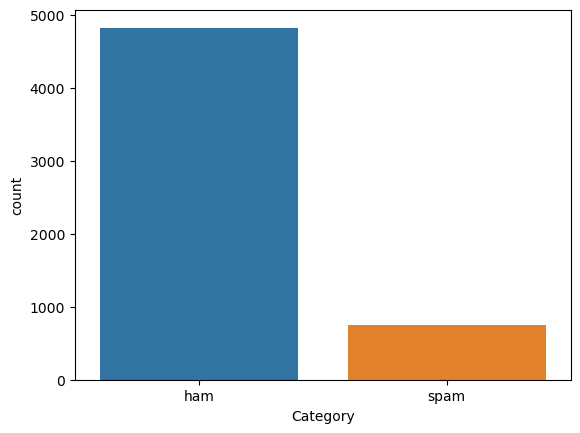

In [228]:
sns.countplot(data=df, x='Category')

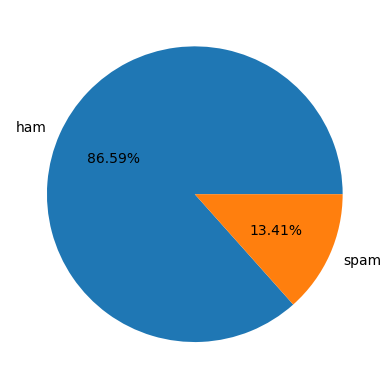

In [229]:
plt.pie(y.value_counts(),labels=y.value_counts().index,autopct='%2.2f%%');

## Data Preparation

In [230]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [231]:
swords = stopwords.words('english')
ps = PorterStemmer()

In [232]:
def clean_txt(text):
    tokens = [token for token in word_tokenize(text) if token.isalnum()] # remove punctuations
    tokens = [token for token in tokens if token.lower() not in swords] # remove stopwords
    tokens = [ps.stem(token) for token in tokens] # stemming
    return tokens

In [233]:
X.apply(clean_txt)

0       [go, jurong, point, crazi, avail, bugi, n, gre...
1                            [ok, lar, joke, wif, u, oni]
2       [free, entri, 2, wkli, comp, win, fa, cup, fin...
3           [u, dun, say, earli, hor, u, c, alreadi, say]
4            [nah, think, goe, usf, live, around, though]
                              ...                        
5567    [2nd, time, tri, 2, contact, u, pound, prize, ...
5568                       [ü, b, go, esplanad, fr, home]
5569                                [piti, mood, suggest]
5570    [guy, bitch, act, like, interest, buy, someth,...
5571                                   [rofl, true, name]
Name: Message, Length: 5572, dtype: object

## TF*IDF Vectorize

In [234]:
tfidf = TfidfVectorizer(analyzer=clean_txt)

In [235]:
X_new = tfidf.fit_transform(X)

## Cross Validation

In [236]:
from sklearn.model_selection import train_test_split

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state=0)

## Build the Decision Tree model for classification

In [238]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)

In [239]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [240]:
y_pred = dtc.predict(X_test)

In [241]:
y_pred

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

## Evaluate the performance of algorithm

In [242]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [243]:
accuracy_score(y_test, y_pred)

0.9583632447954056

In [244]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      0.97      0.98      1208
        spam       0.83      0.86      0.85       185

    accuracy                           0.96      1393
   macro avg       0.91      0.92      0.91      1393
weighted avg       0.96      0.96      0.96      1393



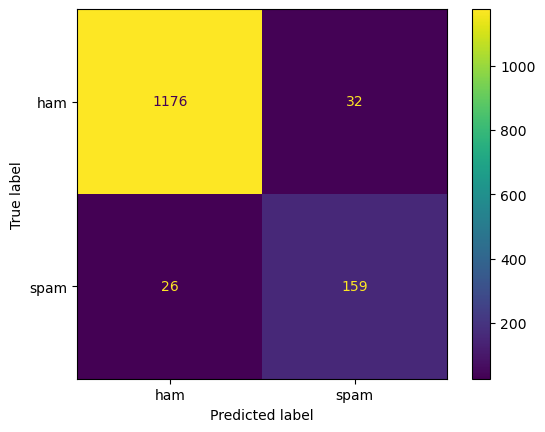

In [245]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

## Download the file sample.csv which contains the unknown mails. Predict the category of these mails.

In [246]:
sample_df = open('sample.csv')

In [247]:
data = sample_df.readlines()

In [248]:
data

['Ok lar i double check wif da hair dresser already he said wun cut v short. He said will cut until i look nice.,,\n',
 'As a valued customer, I am pleased to advise you that following recent review of your Mob No. you are awarded with a £1500 Bonus Prize, call 09066364589\n',
 '"Today is ""song dedicated day.."" Which song will u dedicate for me? Send this to all ur valuable frnds but first rply me...",,\n']

In [249]:
X_test_sample = tfidf.transform(data)

In [250]:
X_test_sample

<3x6852 sparse matrix of type '<class 'numpy.float64'>'
	with 39 stored elements in Compressed Sparse Row format>

In [251]:
y_pred_sample = dtc.predict(X_test_sample)
y_pred_sample

array(['ham', 'spam', 'ham'], dtype=object)

In [252]:
df_new = pd.DataFrame({
    "Messages": data,
    "Predictions": y_pred_sample
})

# Display the DataFrame
print(df_new)


                                            Messages Predictions
0  Ok lar i double check wif da hair dresser alre...         ham
1  As a valued customer, I am pleased to advise y...        spam
2  "Today is ""song dedicated day.."" Which song ...         ham
